## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки**

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю.
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных.

In [ ]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах.

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке
%matplotlib inline

**Шаг 1.2. Загрузим данные**

In [ ]:
training_data = pd.read_excel('msc_pricing_train.xlsx') # загружаем таблицу в переменную training_data

In [ ]:
training_data.head()

Целевая.Цена  Спальни  Ванные  Жилая площадь  Общая площадь  \
0        830000        5    3.50           3490          21780   
1        385000        4    1.75           2360           7620   
2        610000        6    2.75           2040           8560   
3        550000        3    1.75           1940           8376   
4       1300000        3    2.75           3450           5350   

   Количество этажей  Вид на воду  Просмотрены ранее  Состояние  \
0                2.0            0                  0          3   
1                1.0            0                  0          4   
2                1.0            0                  2          4   
3                1.0            0                  0          4   
4                1.5            0                  3          4   

   Оценка риелтора  Площадь без подвала  Площадь подвала  Год постройки  \
0                8                 3490                0           1996   
1                7                 1180             1180           1955   
2                7                 1100              940           1961   
3                8                 1290              650           1963   
4                9                 2590              860           1925   

   Год реновации   Широта  Долгота  
0              0  47.6707 -122.144  
1              0  47.5278 -122.345  
2              0  47.6160 -122.115  
3              0  47.5586 -122.173  
4              0  47.6389 -122.407

# 2. Обработать данные перед обучением модели

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Жилая площадь        15129 non-null  int64  
 2   Общая площадь        15129 non-null  int64  
 3   Количество этажей    15129 non-null  float64
 4   Просмотрены ранее    15129 non-null  int64  
 5   Состояние            15129 non-null  int64  
 6   Оценка риелтора      15129 non-null  int64  
 7   Площадь без подвала  15129 non-null  int64  
 8   Площадь подвала      15129 non-null  int64  
 9   Год постройки        15129 non-null  int64  
 10  Год реновации        15129 non-null  int64  
 11  Широта               15129 non-null  float64
 12  Долгота              15129 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


In [ ]:
training_values = training_data['Целевая.Цена']

In [ ]:
training_points = training_data.drop('Целевая.Цена', axis=1)

In [ ]:
training_points.head()

Жилая площадь  Общая площадь  Количество этажей  Просмотрены ранее  \
0           3490          21780                2.0                  0   
1           2360           7620                1.0                  0   
2           2040           8560                1.0                  2   
3           1940           8376                1.0                  0   
4           3450           5350                1.5                  3   

   Состояние  Оценка риелтора  Площадь без подвала  Площадь подвала  \
0          3                8                 3490                0   
1          4                7                 1180             1180   
2          4                7                 1100              940   
3          4                8                 1290              650   
4          4                9                 2590              860   

   Год постройки  Год реновации   Широта  Долгота  
0           1996              0  47.6707 -122.144  
1           1955              0  47.5278 -122.345  
2           1961              0  47.6160 -122.115  
3           1963              0  47.5586 -122.173  
4           1925              0  47.6389 -122.407

In [ ]:
training_points.shape

(15129, 12)

Видно, что столбца действительно нет, а количество строк не изменилось. Данные в 5 первых строках такие же, как были ранее.

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов.

* Линейная регрессия *linear regression*




Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем  модуль из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели


In [ ]:
from sklearn import linear_model

Прежде чем начать делать ремонт, нужно подготовить инструменты для работы. Аналогично в нашем случае, прежде чем обучать модели, нужно создать их прототипы.  

Чтобы создать модель линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

In [ ]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототип  модели, можем его обучить с помощью обучающей выборки.

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента:
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [ ]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()


* Мы получили обученную модель.
* Теперь необходимо провалидировать модель на новых тестовых данных.

## 4. Загрузить и предобработать данные для тестирования

In [ ]:
test_data = pd.read_excel('msc_pricing_val.xlsx')

In [ ]:
test_data.head()

Целевая.Цена  Жилая площадь  Общая площадь  Количество этажей  \
0        260000           1300          10139                1.0   
1        734500           3280           6845                2.0   
2        325000           1220          12426                1.0   
3       1990000           2880          13500                1.0   
4        315000           1300           3731                1.0   

   Просмотрены ранее  Состояние  Оценка риелтора  Площадь без подвала  \
0                  0          3                7                 1300   
1                  0          3               10                 3280   
2                  4          4                6                 1220   
3                  4          5                8                 1520   
4                  0          3                7                  900   

   Площадь подвала  Год постройки  Год реновации   Широта  Долгота  
0                0           1962           2007  47.3427 -122.087  
1                0           2003              0  47.7042 -122.107  
2                0           1946              0  47.4047 -122.331  
3             1360           1950              0  47.6281 -122.216  
4              400           1993              0  47.5374 -122.270

In [ ]:
test_data.shape

(6484, 13)

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной *test_data* метод **info()**.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Жилая площадь        6484 non-null   int64  
 2   Общая площадь        6484 non-null   int64  
 3   Количество этажей    6484 non-null   float64
 4   Просмотрены ранее    6484 non-null   int64  
 5   Состояние            6484 non-null   int64  
 6   Оценка риелтора      6484 non-null   int64  
 7   Площадь без подвала  6484 non-null   int64  
 8   Площадь подвала      6484 non-null   int64  
 9   Год постройки        6484 non-null   int64  
 10  Год реновации        6484 non-null   int64  
 11  Широта               6484 non-null   float64
 12  Долгота              6484 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 658.7 KB


**Шаг 4.2. Отделяем целевую переменную**

In [ ]:
test_values = test_data['Целевая.Цена']

In [ ]:
test_points = test_data.drop('Целевая.Цена', axis=1)

И проверяем результат записанный в test_points

In [ ]:
test_points.head()

Жилая площадь  Общая площадь  Количество этажей  Просмотрены ранее  \
0           1300          10139                1.0                  0   
1           3280           6845                2.0                  0   
2           1220          12426                1.0                  4   
3           2880          13500                1.0                  4   
4           1300           3731                1.0                  0   

   Состояние  Оценка риелтора  Площадь без подвала  Площадь подвала  \
0          3                7                 1300                0   
1          3               10                 3280                0   
2          4                6                 1220                0   
3          5                8                 1520             1360   
4          3                7                  900              400   

   Год постройки  Год реновации   Широта  Долгота  
0           1962           2007  47.3427 -122.087  
1           2003              0  47.7042 -122.107  
2           1946              0  47.4047 -122.331  
3           1950              0  47.6281 -122.216  
4           1993              0  47.5374 -122.270

In [ ]:
test_points.shape

(6484, 12)

Видно, что количество столбцов уменьшилось на один. Данные в 5 первых строках такие же, как были ранее.

# 5. Провалидировать модель на тестовой выборке

*1.

Получим прогноз целевой переменной на тестовых данных для модели линейной регрессии .

Для этого вызовем  метод **predict()**, в качестве аргумента передадим *test_points*.

In [ ]:
test_predictions_linear = linear_regression_model.predict(test_points)

Качество регрессионных моделей оценим двумя способами:
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки.


In [ ]:
%matplotlib inline

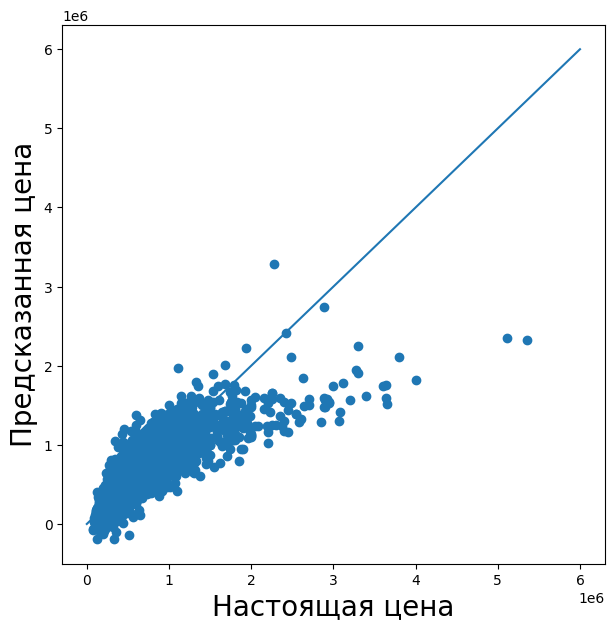

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [ ]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))



MAE: 129717.96, RMSE: 208704.93 для модели линейной регрессии
